In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [110]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [111]:
df.shape

(16598, 11)

In [112]:
df.head

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [113]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [115]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


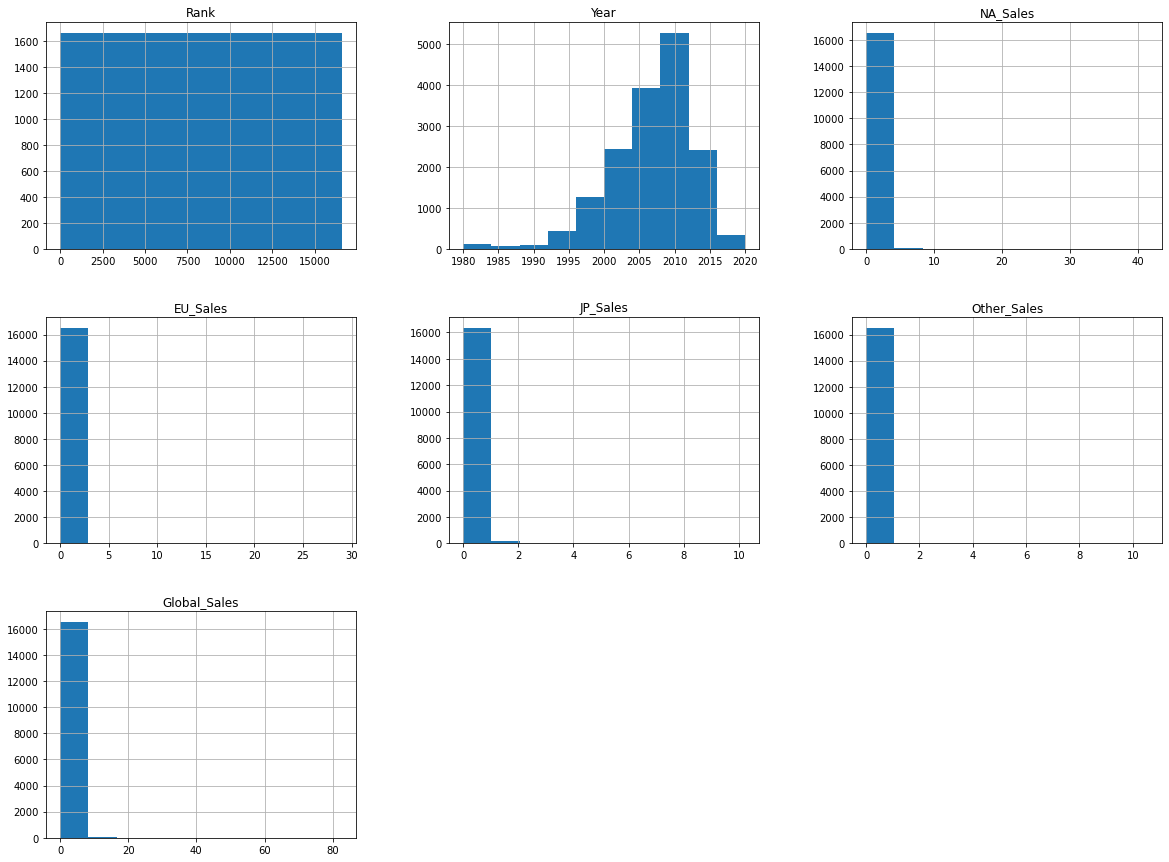

In [116]:
df.hist(bins=10, figsize=(20,15))
plt.show()

In [117]:
console = df.loc[:,'Platform']
genre = df.loc[:,'Genre']
editeur = df.loc[:,'Publisher']

In [118]:
# transformer un array en dataframe
console = pd.DataFrame(pd.unique(console))

In [119]:
genre = pd.DataFrame(pd.unique(genre))
genre

,0
0,Sports
1,Platform
2,Racing
3,Role-Playing
4,Puzzle
5,Misc
6,Shooter
7,Simulation
8,Action
9,Fighting


In [120]:
editeur = pd.DataFrame(pd.unique(editeur))
editeur

,0
0,Nintendo
1,Microsoft Game Studios
2,Take-Two Interactive
3,Sony Computer Entertainment
4,Activision
...,...
574,Inti Creates
575,Takuyo
576,Interchannel-Holon
577,Rain Games


In [121]:
editeur = editeur.sort_values(by=0)
editeur

,0
412,10TACLE Studios
436,1C Company
121,20th Century Fox Video Games
471,2D Boy
77,3DO
...,...
483,imageepoch Inc.
370,inXile Entertainment
113,"mixi, Inc"
374,responDESIGN


In [122]:
console = console.sort_values(by = 0)

In [123]:
genre = genre.sort_values(by = 0)

In [124]:
#creer un csv avec une variable et l'exporter
editeur.to_csv("editeur.csv", index = False, header = False)

In [125]:
console.to_csv("console.csv", index = False, header = False)

In [126]:
genre.to_csv('genre.csv', index = False, header = False)

In [127]:
df.dropna(inplace=True)

In [128]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [129]:
x= df.iloc[:, 3:]
x

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [130]:
y = df.iloc[:, 2]
y

0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: Platform, Length: 16291, dtype: object

In [131]:
ventes=df.select_dtypes(include="number", exclude=None).iloc[:,2:]
ventes.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


In [132]:
platform_edit= df.select_dtypes(include="object", exclude=None).iloc[:,1:2+1]
platform_edit

,Platform,Genre
0,Wii,Sports
1,NES,Platform
2,Wii,Racing
3,Wii,Sports
4,GB,Role-Playing
...,...,...
16593,GBA,Platform
16594,GC,Shooter
16595,PS2,Racing
16596,DS,Puzzle


In [133]:
from pandas import DataFrame
stat={'vente' :['A_Sales', 'U_Sales', 'P_SalesOther_Sales', 'Global_Sales']}
daf = DataFrame(stat, columns=['vente'])
print("Original DataFrame:\n", df)
print("\nbest platform: \n")
stats = df['Platform'].describe()
stats

Original DataFrame:
         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0    

count     16291
unique       31
top          DS
freq       2131
Name: Platform, dtype: object

In [137]:
boite = {'editeur': ["Publisher"]}
daf = DataFrame(boite, columns=['editeur'])
print("Original DataFrame:\n", df)
print("\n Meilleur editeur \n")
statss=df['Publisher'].describe()
statss

Original DataFrame:
         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0    

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

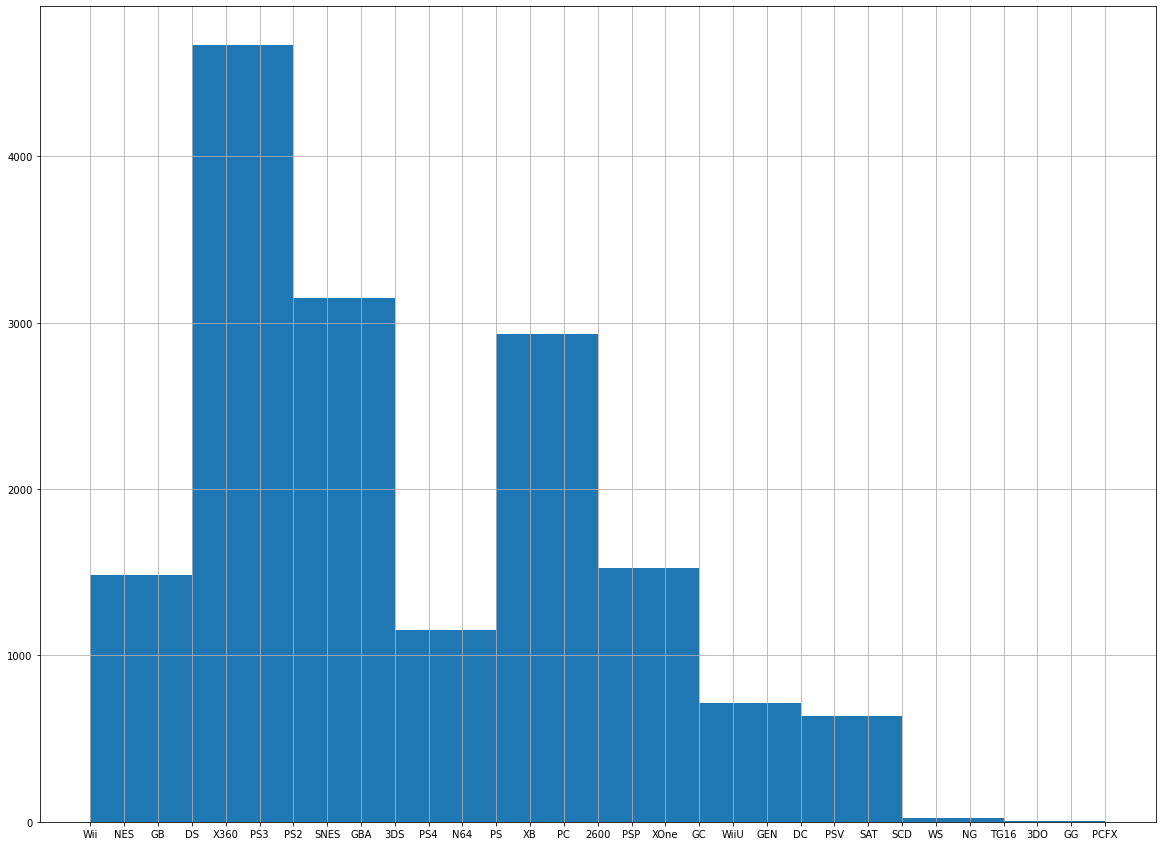

In [ ]:
x = df.iloc[16,1]
y = df.iloc[:,2]
y.hist(bins=10, figsize=(20,15))
plt.show() #plateforme qui vent le plus de jeux

In [136]:
GTA5 = df[df["Name"] == "Grand Theft Auto V"]
GTA5

      Rank                Name Platform    Year   Genre             Publisher  \
16      17  Grand Theft Auto V      PS3  2013.0  Action  Take-Two Interactive   
23      24  Grand Theft Auto V     X360  2013.0  Action  Take-Two Interactive   
44      45  Grand Theft Auto V      PS4  2014.0  Action  Take-Two Interactive   
197    198  Grand Theft Auto V     XOne  2014.0  Action  Take-Two Interactive   
1896  1898  Grand Theft Auto V       PC  2015.0  Action  Take-Two Interactive   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16        7.01      9.27      0.97         4.14         21.40  
23        9.63      5.31      0.06         1.38         16.38  
44        3.80      5.81      0.36         2.02         11.98  
197       2.66      2.01      0.00         0.41          5.08  
1896      0.36      0.64      0.00         0.08          1.08  


In [ ]:
test = GTA5.loc[:, ["platform", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2936,2008.0,Sports,Sony Computer Entertainment,0.64,0.00,0.00,0.05,0.70
16265,2007.0,Adventure,Yeti,0.00,0.00,0.01,0.00,0.01
9581,2015.0,Action,Namco Bandai Games,0.00,0.00,0.13,0.00,0.13
11767,2002.0,Platform,Capcom,0.05,0.02,0.00,0.00,0.07
6456,1999.0,Sports,Konami Digital Entertainment,0.00,0.00,0.25,0.02,0.26
...,...,...,...,...,...,...,...,...
13206,2008.0,Simulation,Destineer,0.05,0.00,0.00,0.00,0.05
12871,2010.0,Shooter,Square Enix,0.05,0.00,0.00,0.00,0.05
3362,2013.0,Platform,Activision,0.40,0.15,0.00,0.06,0.60
7535,1994.0,Racing,BPS,0.00,0.00,0.20,0.00,0.20


In [ ]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)